In [1]:
!pip install scikit-learn



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
# File path in Google Drive
file_path = '/content/drive/My Drive/covid19/Covid Dataset.csv'

# Load the data from the file
data = pd.read_csv(file_path, delimiter='\t')


In [4]:


# Load the data from the file
#data = pd.read_csv('Covid Dataset.csv', delimiter='\t')


80% of the data is used for training and 20% for testing in each step



The random_state parameter ensures that the data split remains consistent whenever you run the code. It allows you to obtain the same split every time or share the code with others for consistent results

In [5]:

from sklearn.model_selection import train_test_split

# Load the data from the file
data = pd.read_csv(file_path, delimiter=',')

# Convert 'yes' and 'no' to binary values
data.replace({'yes': 1, 'no': 0}, inplace=True)

# Perform one-hot encoding for categorical columns if needed

# Split the data into features (X) and labels (y)
X = data.drop('COVID-19', axis=1)  # Features
y = data['COVID-19']  # Labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (4347, 20)
X_test shape: (1087, 20)
y_train shape: (4347,)
y_test shape: (1087,)


In [6]:
from sklearn.preprocessing import LabelEncoder
e=LabelEncoder()

In [7]:



# data visualization library
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(context='notebook', style='darkgrid', palette='colorblind', font='sans-serif', font_scale=1, rc=None)
matplotlib.rcParams['figure.figsize'] =[8,8]
matplotlib.rcParams.update({'font.size': 15})
matplotlib.rcParams['font.family'] = 'sans-serif'

In [8]:
# Load the data from the file
data = pd.read_csv(file_path)

# Display the dataset
print(data.head())

  Breathing Problem Fever Dry Cough Sore throat Running Nose Asthma  \
0               Yes   Yes       Yes         Yes          Yes     No   
1               Yes   Yes       Yes         Yes           No    Yes   
2               Yes   Yes       Yes         Yes          Yes    Yes   
3               Yes   Yes       Yes          No           No    Yes   
4               Yes   Yes       Yes         Yes          Yes     No   

  Chronic Lung Disease Headache Heart Disease Diabetes  ... Fatigue   \
0                   No       No            No      Yes  ...      Yes   
1                  Yes      Yes            No       No  ...      Yes   
2                  Yes      Yes            No      Yes  ...      Yes   
3                   No       No           Yes      Yes  ...       No   
4                  Yes      Yes           Yes      Yes  ...       No   

  Gastrointestinal  Abroad travel Contact with COVID Patient  \
0               Yes            No                        Yes   
1           

In [9]:
# Load the data from the file
covid = pd.read_csv(file_path)

# Display the dataset information
covid.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5434 entries, 0 to 5433
Data columns (total 21 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Breathing Problem                        5434 non-null   object
 1   Fever                                    5434 non-null   object
 2   Dry Cough                                5434 non-null   object
 3   Sore throat                              5434 non-null   object
 4   Running Nose                             5434 non-null   object
 5   Asthma                                   5434 non-null   object
 6   Chronic Lung Disease                     5434 non-null   object
 7   Headache                                 5434 non-null   object
 8   Heart Disease                            5434 non-null   object
 9   Diabetes                                 5434 non-null   object
 10  Hyper Tension                            5434 non-null   obj

In [10]:
covid.describe(include='all')


,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
count,5434,5434,5434,5434,5434,5434,5434,5434,5434,5434,...,5434,5434,5434,5434,5434,5434,5434,5434,5434,5434
unique,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,1,1,2
top,Yes,Yes,Yes,Yes,Yes,No,No,Yes,No,No,...,Yes,No,No,Yes,No,Yes,No,No,No,Yes
freq,3620,4273,4307,3953,2952,2920,2869,2736,2911,2846,...,2821,2883,2983,2726,2924,2820,3172,5434,5434,4383


In [11]:
covid.columns


Index(['Breathing Problem', 'Fever', 'Dry Cough', 'Sore throat',
       'Running Nose', 'Asthma', 'Chronic Lung Disease', 'Headache',
       'Heart Disease', 'Diabetes', 'Hyper Tension', 'Fatigue ',
       'Gastrointestinal ', 'Abroad travel', 'Contact with COVID Patient',
       'Attended Large Gathering', 'Visited Public Exposed Places',
       'Family working in Public Exposed Places', 'Wearing Masks',
       'Sanitization from Market', 'COVID-19'],
      dtype='object')

In [12]:
# create a table with data missing
missing_values=covid.isnull().sum() # missing values

percent_missing = covid.isnull().sum()/covid.shape[0]*100 # missing value %

value = {
    'missing_values ':missing_values,
    'percent_missing %':percent_missing
}
frame=pd.DataFrame(value)
frame

,missing_values,percent_missing %
Breathing Problem,0,0.0
Fever,0,0.0
Dry Cough,0,0.0
Sore throat,0,0.0
Running Nose,0,0.0
Asthma,0,0.0
Chronic Lung Disease,0,0.0
Headache,0,0.0
Heart Disease,0,0.0
Diabetes,0,0.0


<Axes: xlabel='COVID-19', ylabel='count'>

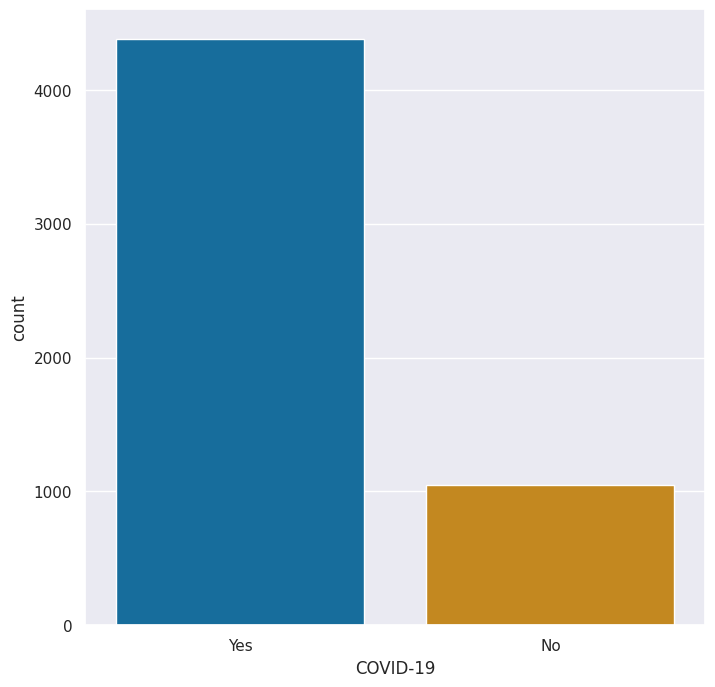

In [13]:
sns.countplot(x='COVID-19',data=covid)

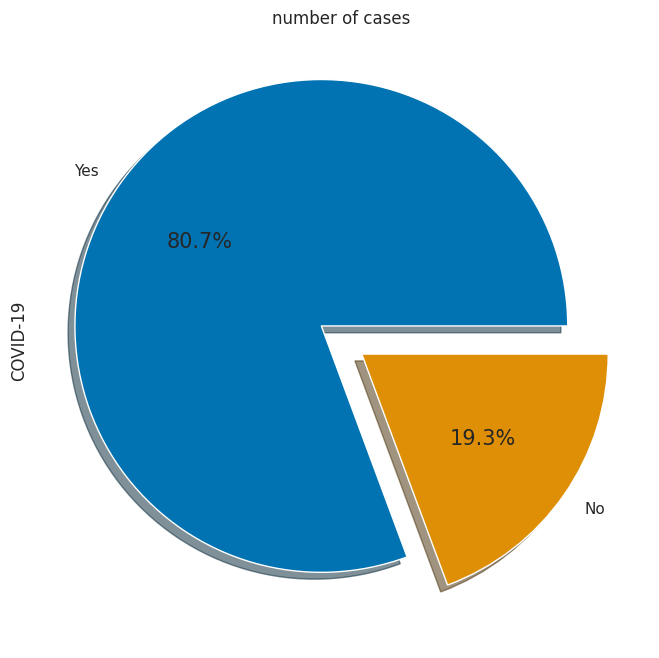

In [14]:
covid["COVID-19"].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True)
plt.title('number of cases');

<Axes: xlabel='Breathing Problem', ylabel='count'>

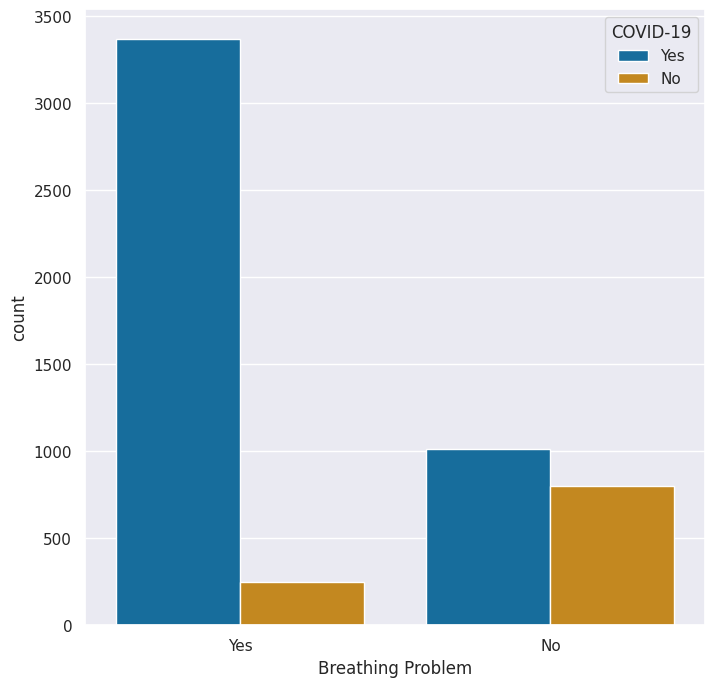

In [15]:
sns.countplot(x='Breathing Problem',hue='COVID-19',data=covid)


**feature transformation**


In [16]:
from sklearn.preprocessing import LabelEncoder
e=LabelEncoder()

In [17]:
covid['Breathing Problem']=e.fit_transform(covid['Breathing Problem'])
covid['Fever']=e.fit_transform(covid['Fever'])
covid['Dry Cough']=e.fit_transform(covid['Dry Cough'])
covid['Sore throat']=e.fit_transform(covid['Sore throat'])
covid['Running Nose']=e.fit_transform(covid['Running Nose'])
covid['Asthma']=e.fit_transform(covid['Asthma'])
covid['Chronic Lung Disease']=e.fit_transform(covid['Chronic Lung Disease'])
covid['Headache']=e.fit_transform(covid['Headache'])
covid['Heart Disease']=e.fit_transform(covid['Heart Disease'])
covid['Diabetes']=e.fit_transform(covid['Diabetes'])
covid['Hyper Tension']=e.fit_transform(covid['Hyper Tension'])
covid['Abroad travel']=e.fit_transform(covid['Abroad travel'])
covid['Contact with COVID Patient']=e.fit_transform(covid['Contact with COVID Patient'])
covid['Attended Large Gathering']=e.fit_transform(covid['Attended Large Gathering'])
covid['Visited Public Exposed Places']=e.fit_transform(covid['Visited Public Exposed Places'])
covid['Family working in Public Exposed Places']=e.fit_transform(covid['Family working in Public Exposed Places'])
covid['Wearing Masks']=e.fit_transform(covid['Wearing Masks'])
covid['Sanitization from Market']=e.fit_transform(covid['Sanitization from Market'])
covid['COVID-19']=e.fit_transform(covid['COVID-19'])
covid['Dry Cough']=e.fit_transform(covid['Dry Cough'])
covid['Sore throat']=e.fit_transform(covid['Sore throat'])
covid['Gastrointestinal ']=e.fit_transform(covid['Gastrointestinal '])
covid['Fatigue ']=e.fit_transform(covid['Fatigue '])

In [18]:
covid.head()


,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,1,1,1,1,1,0,0,0,0,1,...,1,1,0,1,0,1,1,0,0,1
1,1,1,1,1,0,1,1,1,0,0,...,1,0,0,0,1,1,0,0,0,1
2,1,1,1,1,1,1,1,1,0,1,...,1,1,1,0,0,0,0,0,0,1
3,1,1,1,0,0,1,0,0,1,1,...,0,0,1,0,1,1,0,0,0,1
4,1,1,1,1,1,0,1,1,1,1,...,0,1,0,1,0,1,0,0,0,1


In [19]:
covid.dtypes.value_counts()


int64    21
dtype: int64

**info about our data after transformation**


In [20]:
covid.describe(include='all')


,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
count,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,...,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.0,5434.0,5434.000000
mean,0.666176,0.786345,0.792602,0.727457,0.543246,0.462643,0.472028,0.503497,0.464299,0.476261,...,0.519139,0.469452,0.451049,0.501656,0.461907,0.518955,0.416268,0.0,0.0,0.806588
std,0.471621,0.409924,0.405480,0.445309,0.498172,0.498648,0.499263,0.500034,0.498770,0.499482,...,0.499680,0.499112,0.497644,0.500043,0.498593,0.499687,0.492984,0.0,0.0,0.395009
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
25%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.0,0.0,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,1.000000


In [21]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Convert the target variable to numerical values
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Perform one-hot encoding on the feature variables
onehot_encoder = OneHotEncoder()
X_train_encoded = onehot_encoder.fit_transform(X_train)
X_test_encoded = onehot_encoder.transform(X_test)

# Define the kernels to try
kernels = ['linear', 'rbf']

# Create an SVM model for each kernel and evaluate their performance
for kernel in kernels:
    # Create the SVM model
    svm_model = SVC(kernel=kernel)

    # Train the SVM model
    svm_model.fit(X_train_encoded, y_train_encoded)

    # Make predictions on the testing set
    y_pred_encoded = svm_model.predict(X_test_encoded)

    # Decode the predictions back to the original labels
    y_pred = label_encoder.inverse_transform(y_pred_encoded)

    # Calculate the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)
    percentage = accuracy * 100

    # Display the accuracy percentage for the current kernel
    print("Kernel:", kernel)
    print("Accuracy:", percentage)
    print()


Kernel: linear
Accuracy: 97.42410303587856

Kernel: rbf
Accuracy: 98.4360625574977



In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Load the dataset
# Assuming you have already loaded and prepared the dataset in the 'data' DataFrame

# Separate the features and target variable
X = data.drop('COVID-19', axis=1)
y = data['COVID-19']

# Convert the target variable to numerical values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Perform one-hot encoding for categorical columns
onehot_encoder = OneHotEncoder()
X_encoded = onehot_encoder.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

# Create a Random Forest Classifier model
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = rf_model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy score
print("Accuracy:", accuracy)



Accuracy: 0.984360625574977


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
# Assuming you have already loaded and prepared the dataset in the 'data' DataFrame

# Separate the features and target variable
X = data.drop('COVID-19', axis=1)
y = data['COVID-19']

# Convert the target variable to numerical values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# List of K values to try
k_values = [2, 3, 7,11]

# Iterate over different K values
for k in k_values:
    # Create a KNN classifier with the current K value
    knn_model = KNeighborsClassifier(n_neighbors=k)

    # Train the KNN model
    knn_model.fit(X_train_encoded, y_train_encoded)

    # Make predictions on the testing set
    y_pred = knn_model.predict(X_test_encoded)

    # Decode the predictions back to the original labels
    y_pred_decoded = label_encoder.inverse_transform(y_pred)

    # Calculate the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)
    percentage = accuracy * 100

    # Display the accuracy percentage for the current K value
    print(f"Accuracy for K={k}: {percentage}%")


Accuracy for K=2: 97.70009199632015%
Accuracy for K=3: 97.51609935602575%
Accuracy for K=7: 97.33210671573137%
Accuracy for K=11: 97.60809567617295%


In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Load the dataset
# Assuming you have already loaded and prepared the dataset in the 'covid' DataFrame

# Separate the features and target variable
X = covid.drop('COVID-19', axis=1)
y = covid['COVID-19']

# Convert the target variable to numerical values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Perform one-hot encoding for categorical columns
onehot_encoder = OneHotEncoder()
X_encoded = onehot_encoder.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

# Create a Logistic Regression model
logreg_model = LogisticRegression(random_state=42)

# Train the model
logreg_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = logreg_model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy score
print("Accuracy:", accuracy)


Accuracy: 0.9714811407543699


In [26]:
import pandas as pd

# Define the model names and accuracy scores
model_names = ['SVM (RBF)', 'SVM (Linear)', 'Random Forest', 'KNN (K=2)', 'KNN (K=3)', 'KNN (K=7)', 'KNN (K=11)', 'Logistic Regression']
accuracy_scores = [98.4360625574977, 97.42410303587856, 98.4360625574977, 97.70009199632015, 97.51609935602575, 97.33210671573137, 97.60809567617295, 97.14811407543699]

# Create a DataFrame with model names and accuracy scores
data = {
    'Model': model_names,
    'Accuracy': accuracy_scores
}

df = pd.DataFrame(data)

# Sort the DataFrame by Accuracy column in descending order
df_sorted = df.sort_values(by='Accuracy', ascending=False)

# Reset the index of the sorted DataFrame
df_sorted.reset_index(drop=True, inplace=True)

# Add a ranking column starting from 1
df_sorted['Rank'] = range(1, len(df_sorted) + 1)

# Display the sorted DataFrame
print(df_sorted)


                 Model   Accuracy  Rank
0            SVM (RBF)  98.436063     1
1        Random Forest  98.436063     2
2            KNN (K=2)  97.700092     3
3           KNN (K=11)  97.608096     4
4            KNN (K=3)  97.516099     5
5         SVM (Linear)  97.424103     6
6            KNN (K=7)  97.332107     7
7  Logistic Regression  97.148114     8


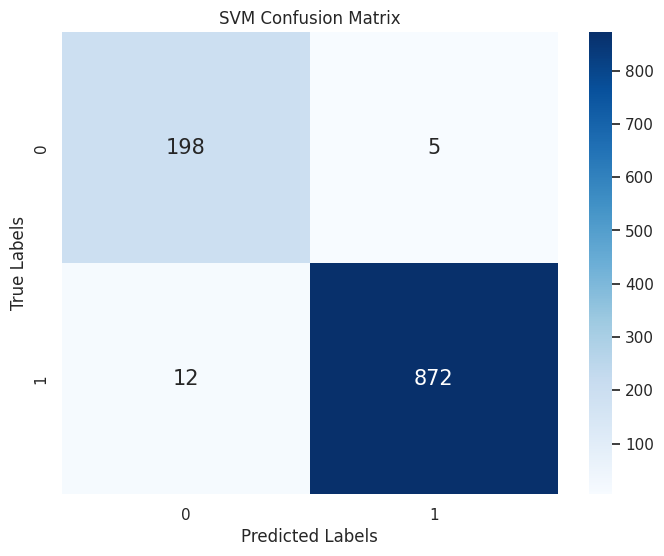

SVM Accuracy: 0.984360625574977
SVM Precision: 0.9942987457240593
SVM Recall: 0.9864253393665159


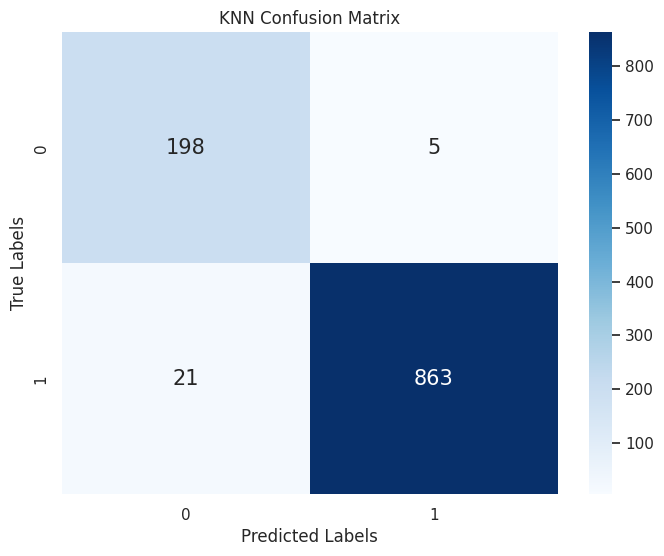

KNN Accuracy: 0.9760809567617296
KNN Precision: 0.9942396313364056
KNN Recall: 0.9762443438914027


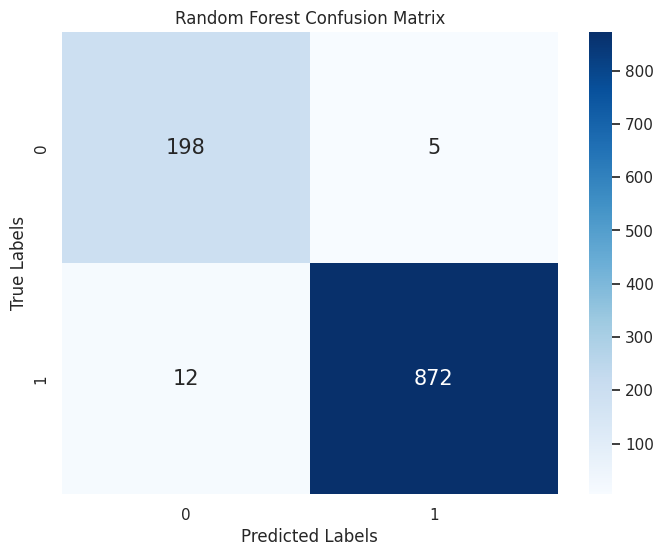

Random Forest Accuracy: 0.984360625574977
Random Forest Precision: 0.9942987457240593
Random Forest Recall: 0.9864253393665159


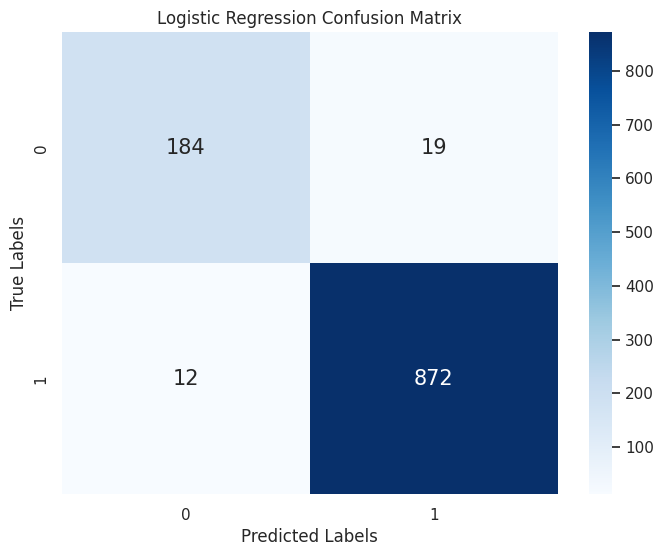

Logistic Regression Accuracy: 0.9714811407543699
Logistic Regression Precision: 0.978675645342312
Logistic Regression Recall: 0.9864253393665159


In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluate SVM model
svm_pred = svm_model.predict(X_test)
svm_cm = confusion_matrix(y_test, svm_pred)
svm_accuracy = accuracy_score(y_test, svm_pred)
svm_precision = precision_score(y_test, svm_pred)
svm_recall = recall_score(y_test, svm_pred)

# Visualize SVM confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(svm_cm, annot=True, cmap='Blues', fmt='d')
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Print SVM evaluation metrics
print('SVM Accuracy:', svm_accuracy)
print('SVM Precision:', svm_precision)
print('SVM Recall:', svm_recall)

# Evaluate KNN model
knn_pred = knn_model.predict(X_test)
knn_cm = confusion_matrix(y_test, knn_pred)
knn_accuracy = accuracy_score(y_test, knn_pred)
knn_precision = precision_score(y_test, knn_pred)
knn_recall = recall_score(y_test, knn_pred)

# Visualize KNN confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(knn_cm, annot=True, cmap='Blues', fmt='d')
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Print KNN evaluation metrics
print('KNN Accuracy:', knn_accuracy)
print('KNN Precision:', knn_precision)
print('KNN Recall:', knn_recall)

# Evaluate Random Forest model
rf_pred = rf_model.predict(X_test)
rf_cm = confusion_matrix(y_test, rf_pred)
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)

# Visualize Random Forest confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(rf_cm, annot=True, cmap='Blues', fmt='d')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Print Random Forest evaluation metrics
print('Random Forest Accuracy:', rf_accuracy)
print('Random Forest Precision:', rf_precision)
print('Random Forest Recall:', rf_recall)

# Evaluate Logistic Regression model
logreg_pred = logreg_model.predict(X_test)
logreg_cm = confusion_matrix(y_test, logreg_pred)
logreg_accuracy = accuracy_score(y_test, logreg_pred)
logreg_precision = precision_score(y_test, logreg_pred)
logreg_recall = recall_score(y_test, logreg_pred)

# Visualize Logistic Regression confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(logreg_cm, annot=True, cmap='Blues', fmt='d')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Print Logistic Regression evaluation metrics
print('Logistic Regression Accuracy:', logreg_accuracy)
print('Logistic Regression Precision:', logreg_precision)
print('Logistic Regression Recall:', logreg_recall)
